In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
temp_data = pd.read_csv('temp.csv', sep=" ")

Данные хранятся в файле `temp.csv` в виде 2х столбцов,`Z` - сопротивление и `T` - температура

In [2]:
temp_data.head(12)

Z   T
0    27  71
1    31  64
2    43  52
3    58  41
4    69  33
5    86  23
6   102  17
7   111  12
8   122   2
9   137   0
10   18  87
11  176  -5

Зависимость сопротивления от температуры:


 $Z = 1024 \frac{R}{R_C + R_0}$


где $R = R_0 e ^ {k(T - T_0)}$

При условии что $R_0 << R_C$, получим


 $Z = 1024 \frac{R_0 e ^ {k(T - T_0)}}{R_C}$

Зависимость экспотенциальная ее можно увидеть на графике

In [3]:
temp_data.plot(x ='T', y='Z', kind = 'scatter')

<AxesSubplot:xlabel='T', ylabel='Z'>

Для получения зависости с помощью МНК, необходимо привести в линейный вид:


 $lnZ = ln(1024\frac{R_0}{R_C}) \cdot k(T-T_0)$


В итоге получим линейную зависимость:


 $lnZ = wT + w_0$


Где $w = kln(1024\frac{R_0}{R_C})$  
    $w_0 = -kln(1024\frac{R_0}{R_C})T_0$
    
Сопротивление же получится:


$Z = e ^ {wT + w_0}$

Линейную зависимость $lnZ$ от $T$ можно показать на графике

In [4]:
temp_data["Z"] = temp_data["Z"].astype("float64")
temp_data["log_Z"] = np.log(temp_data["Z"])
temp_data.head(12)

Z   T     log_Z
0    27.0  71  3.295837
1    31.0  64  3.433987
2    43.0  52  3.761200
3    58.0  41  4.060443
4    69.0  33  4.234107
5    86.0  23  4.454347
6   102.0  17  4.624973
7   111.0  12  4.709530
8   122.0   2  4.804021
9   137.0   0  4.919981
10   18.0  87  2.890372
11  176.0  -5  5.170484

In [5]:
temp_data.plot(x ='T', y='log_Z', kind = 'scatter')

<AxesSubplot:xlabel='T', ylabel='log_Z'>

Решение находится в файле `resistor.cpp`.

```c++
auto data = load_csv<Eigen::MatrixXd>("../../test_data/temp.csv");
// create log Z
Eigen::MatrixXd Z = data.col(0);
for (long i = 0; i < Z.rows(); ++i) {
    Z(i, 0) = std::log(data(i, 0));
}
Eigen::MatrixXd T(data.rows(), 2);
// append ones col for matrix
for (long i = 0; i < T.rows(); ++i) {
    T(i, 0) = data(i, 1);
    T(i, 1) = 1;
}

auto T_2 = T.transpose() * T;
auto T_Z = T.transpose() * Z;

std::cout << T_2.lu().solve(T_Z) << std::endl;
```
  
Вывод:
```bash
-0.0236806
   4.98004
```
Проверим на графике

In [6]:
w = np.array([-0.0236806, 4.98004])

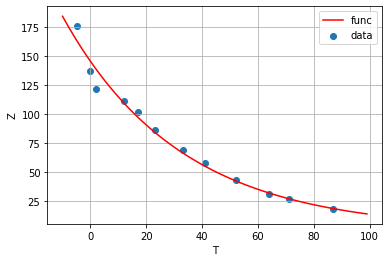

In [7]:
test_data = np.arange(-10, 100, 1)
test_data = test_data.reshape(len(test_data), 1)
test_data = np.hstack((test_data, np.ones((1, len(test_data))).reshape((len(test_data), 1))))
pred_test =  np.exp(test_data.dot(w))

plt.plot(test_data[:,0], pred_test, c='red', label='func')
plt.scatter(temp_data["T"], temp_data["Z"], label='data')

plt.xlabel('T')
plt.ylabel('Z')

plt.legend()
plt.grid()
plt.show()